In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
plt.rcParams.update({'font.size': 20,
                     'mathtext.fontset' : 'stix',
                     'font.family' : 'STIXGeneral'
                     })

In [7]:
# external parameters

R = 0
BN = 7
numsteps=1000000
Lcte = .1
nu = .01
f0 = 1.
size = 100 # ensemble size

N = 2**BN
dx = 1./N
Ltot = 1.
L = Lcte*Ltot
X = np.fft.fftfreq(N) * Ltot
K = np.fft.fftfreq(N) * N / Ltot
Cf = np.exp(-.5*X*X/L/L)
N2 = N//2+1
visc = 4.*np.pi*np.pi*nu

dt = .1*dx*dx/(np.pi*np.pi*nu*Ltot*Ltot)

In [4]:
# correlation function of force in Fourier space
# E[g(k)g^*(k')]
# g = F[f]
def cfk_theo(x):
    return np.power(2.*np.pi,0.5)*L*np.exp(-2.*np.pi*np.pi*L*L*(K[int(x)]**2))

# correlation function of velocity field in Fourier space
# E[v(k)v^*(k')]
# v = F[u]
def cuk_theo(x):
    # this is for ornstein-uhlenbeck
    #return .5*f0/visc*cfk_theo(kx,ky,kz)
    # now for 1d heat equation
    return .5*f0*cfk_theo(K[int(x)])/visc/(K[int(x)]**2)#load velocity fields for one realization

# correlation function of zero mode of velocity field in Fourier space
# E[v(0)v^*(0)]
def cuk_zero(int_time):
    return f0*cfk_theo(0)*int_time*dt

In [27]:
# lines below, verifying sums of variances of Fourier modes
# excludes Fourier modes with ki=0
var_theo  = np.sum(np.fromiter((cuk_theo(i) for i in range(1,N2)), float))
# zero mode is added separately, because it depends on time

In [23]:
var_k1 = np.zeros(numsteps)
for r in range(size):
    var_k1 += np.fromfile("data/HeatVar_1_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_k1 *= 1./size

var_kN = np.zeros(numsteps)
for r in range(size):
    var_kN += np.fromfile("data/HeatVar_N_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_kN *= 1./size

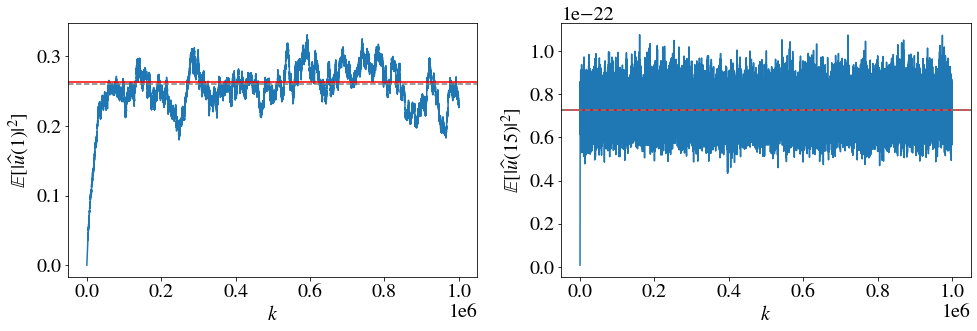

In [24]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

axs[0].set_xlabel(r'$k$')
axs[0].set_ylabel(r'$\mathbb{E}[|\widehat{u}(1)|^2]$')
axs[0].plot(var_k1)
axs[0].axhline(np.mean(var_k1[numsteps//2:]),color='red')
axs[0].axhline(cuk_theo(1),color='grey',linestyle='dashed')

axs[1].set_xlabel(r'$k$')
axs[1].set_ylabel(r'$\mathbb{E}[|\widehat{u}(15)|^2]$')
axs[1].plot(var_kN)
axs[1].axhline(np.mean(var_kN[numsteps//2:]),color='red')
axs[1].axhline(cuk_theo(15),color='grey',linestyle='dashed')

plt.tight_layout()
plt.savefig("heat_1d_fourier_modes.png")
plt.show()

In [36]:
var_f = np.zeros(numsteps)
for r in range(size):
    var_f += np.fromfile("data/HeatVar_f_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_f *= 1./size

var_x = np.zeros(numsteps)
for r in range(size):
    var_x += np.fromfile("data/HeatVar_x_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_x *= 1./size

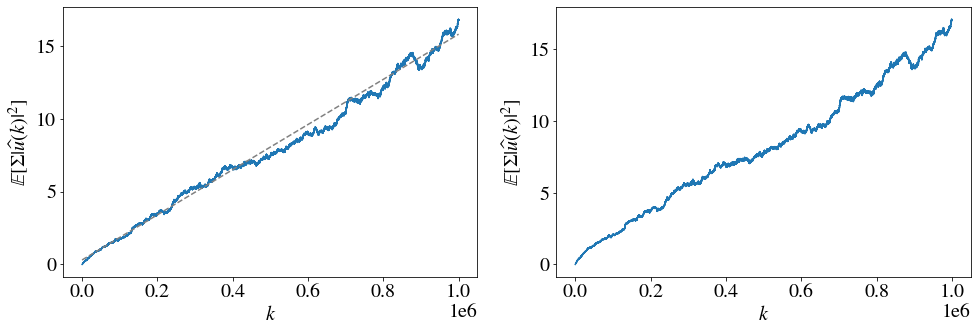

In [37]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

axs[0].set_xlabel(r'$k$')
axs[0].set_ylabel(r'$\mathbb{E}[\Sigma |\widehat{u}(k)|^2]$')
axs[0].plot(var_f)
axs[0].plot(var_theo+cuk_zero(range(numsteps)),color='grey',linestyle='dashed')

axs[1].set_xlabel(r'$k$')
axs[1].set_ylabel(r'$\mathbb{E}[\Sigma |\widehat{u}(k)|^2]$')
axs[1].plot(var_x)
#axs[1].plot(var_theo+cuk_zero(range(numsteps)),color='grey',linestyle='dashed')

plt.tight_layout()
#plt.savefig("heat_1d_fourier_modes.png")
plt.show()